## Importing necessary libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



## Loading and Preprocessing the Dataset

In [2]:
dataset=r'C:\Users\suchika\Desktop\Projects\Mask Detector Project\dataset clubbed\dataset'
imagePaths=list(paths.list_images(dataset))

In [3]:
imagePaths

['C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask0.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask1.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask10.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask100.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask1000.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask1001.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask1002.jpg',
 'C:\\Users\\suchika\\Desktop\\Projects\\Mask Detector Project\\dataset clubbed\\dataset\\without_mask\\without_mask1003

In [4]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
    


c:\users\suchika\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7411765 , -0.79607844, -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9529412 , -0.81960785],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.85882354, -0.8901961 , -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.38823533, -0.9607843 

In [6]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [8]:
data.shape

(3921, 224, 224, 3)

In [9]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

## One-hot encoding and Image Augmentation

In [10]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [11]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [13]:
train_X.shape

(3136, 224, 224, 3)

In [14]:
train_Y.shape

(3136, 2)

In [15]:
test_X.shape

(785, 224, 224, 3)

In [16]:
test_Y.shape

(785, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,
                       zoom_range=0.15,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.15,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest')

## Preparing MobileNetV2 for Image Augmentation

In [18]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [19]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
__________________________________________________________________________________________________


In [24]:

headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [25]:
for layer in baseModel.layers:
    layer.trainable=False

## Compiling and Training the Model

In [26]:
#Initializing number of epochs, batch size and learning rate
learning_rate = 1e-4
Epochs = 20
BS = 32

#Compiling our model
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

#Traing the model
H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


Epoch 1/20
98/98 [==============================] - 287s 3s/step - loss: 0.4138 - accuracy: 0.8176 - val_loss: 0.1230 - val_accuracy: 0.9592
Epoch 2/20
98/98 [==============================] - 110s 1s/step - loss: 0.1901 - accuracy: 0.9260 - val_loss: 0.0830 - val_accuracy: 0.9732
Epoch 3/20
98/98 [==============================] - 111s 1s/step - loss: 0.1383 - accuracy: 0.9496 - val_loss: 0.0714 - val_accuracy: 0.9796
Epoch 4/20
98/98 [==============================] - 108s 1s/step - loss: 0.1173 - accuracy: 0.9585 - val_loss: 0.0631 - val_accuracy: 0.9783
Epoch 5/20
98/98 [==============================] - 109s 1s/step - loss: 0.1050 - accuracy: 0.9595 - val_loss: 0.0574 - val_accuracy: 0.9809
Epoch 6/20
98/98 [==============================] - 104s 1s/step - loss: 0.0819 - accuracy: 0.9719 - val_loss: 0.0562 - val_accuracy: 0.9796
Epoch 7/20
98/98 [==============================] - 113s 1s/step - loss: 0.0796 - accuracy: 0.9729 - val_loss: 0.0525 - val_accuracy: 0.9822
Epoch 8/20
98

## Making Predictions

In [27]:
#Serializing the model to disk
model.save(r'C:\Users\suchika\Desktop\Mask Detector\MaskTrain.model')

#Taking Predictions
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)

print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.97      1.00      0.98       401
without_mask       0.99      0.97      0.98       384

    accuracy                           0.98       785
   macro avg       0.98      0.98      0.98       785
weighted avg       0.98      0.98      0.98       785



In [11]:
from tensorflow.keras.models import load_model
model=load_model(r'C:\Users\suchika\Desktop\Mask Detector\MaskTrain.model')

## Plotting the final results

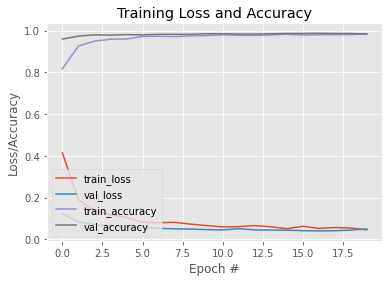

In [29]:
# plot the training loss and accuracy

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
#plt.savefig(r'C:\Python37\Projects\face-mask-detector\plot_v2.png')
